<a href="https://colab.research.google.com/github/mpoquet/light-cont-repro-25/blob/main/intervalle_de_confiance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (2).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Data = pd.read_csv('data.csv', sep=';')
df = pd.DataFrame(data = Data)
print(df.head())

  runtime overhead   value
0  native   fileio  281.54
1  native   fileio  267.88
2  native   fileio  263.95
3  native   fileio  264.31
4  native   fileio  268.57


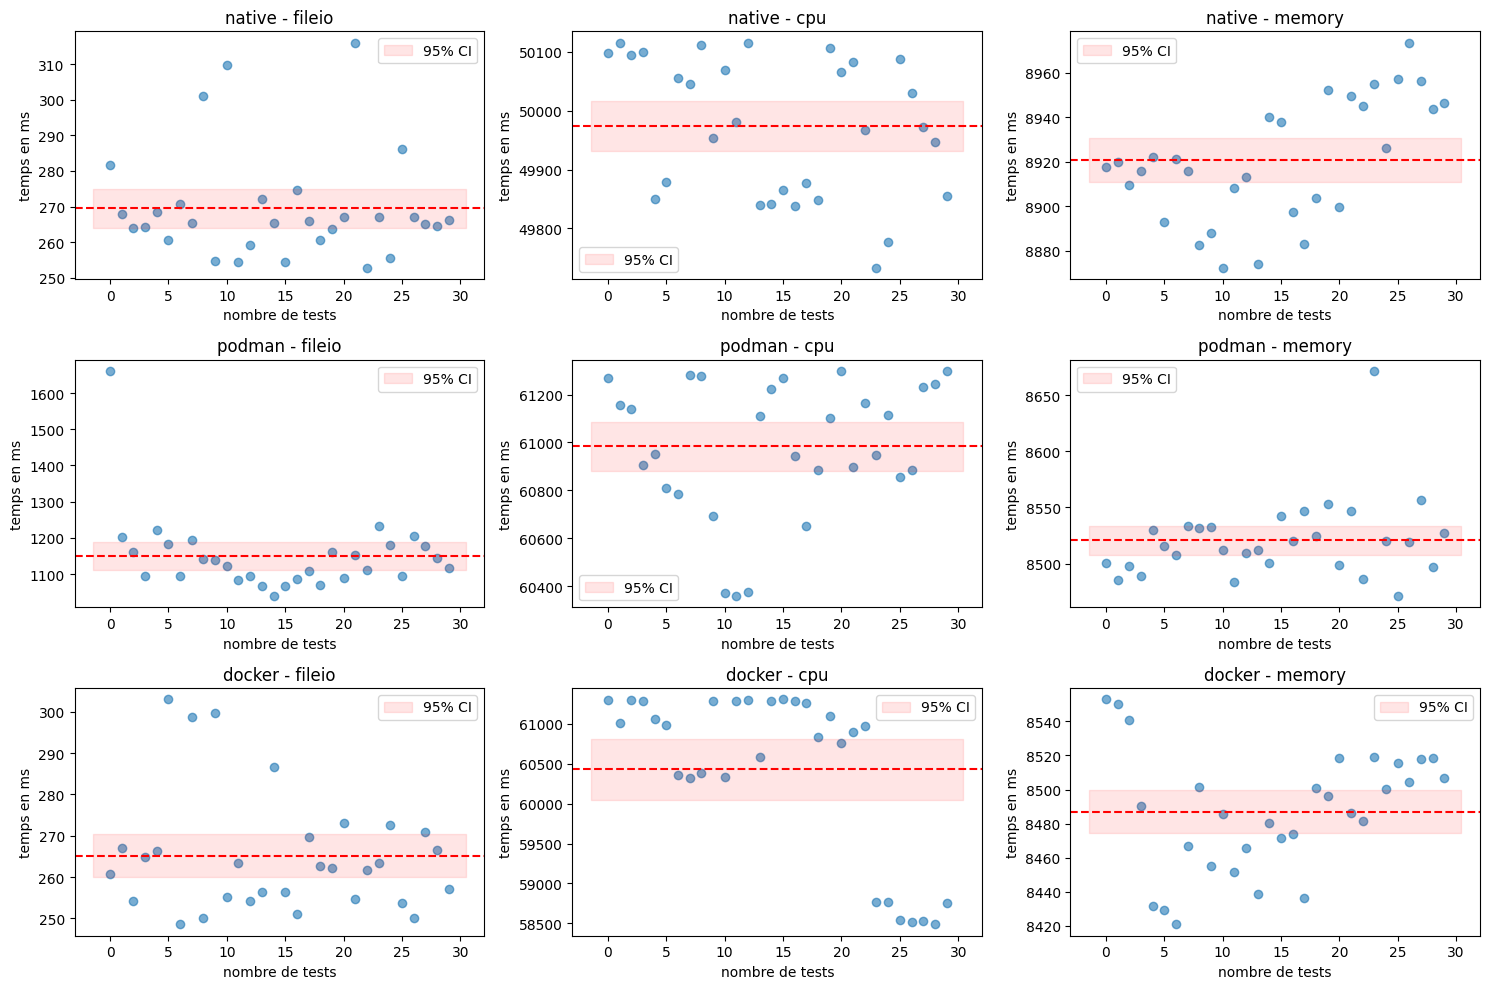

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load data properly (if reading from CSV)
df = pd.read_csv('data (2).csv', sep=';')

# If data is in one column, split it
if len(df.columns) == 1:
    df[['runtime', 'overhead', 'value']] = df.iloc[:, 0].str.split(';', expand=True)
    df['value'] = df['value'].astype(float)

# Proceed with plotting
runtimes = ["native", "podman", "docker"]
overheads = ["fileio", "cpu", "memory"]

fig, axes = plt.subplots(len(runtimes), len(overheads), figsize=(15, 10))

for i, runtime in enumerate(runtimes):
    for j, overhead in enumerate(overheads):
        ax = axes[i, j]
        current_data = df[(df['runtime'] == runtime) & (df['overhead'] == overhead)]['value']

        if len(current_data) == 0:
            ax.text(0.5, 0.5, 'No Data', ha='center')
            continue

        mean = current_data.mean()
        ci = 1.96 * current_data.sem()  # 95% CI

        ax.scatter(np.arange(len(current_data)), current_data, alpha=0.6)
        ax.axhline(mean, color='red', linestyle='--')
        ax.fill_between(
            x=ax.get_xlim(),
            y1=mean - ci,
            y2=mean + ci,
            color='red',
            alpha=0.1,
            label='95% CI'
        )
        # --- SET AXIS LABELS ---
        ax.set_xlabel('nombre de tests', fontsize=10)  # X-axis label
        ax.set_ylabel('temps en ms', fontsize=10)  # Y-axis label
        ax.set_title(f"{runtime} - {overhead}")
        ax.legend()

plt.tight_layout()
plt.show()